# APS 1 - Transferência de Calor e Mecânica dos Sólidos

In [107]:
# Importando Bibliotecas
from math import *
import matplotlib.pyplot as plt
import numpy as np

# Declarando variáveis
Tb = 100 + 273            # Temperatura da Base [K]
Ta = 25 + 273             # Temperatura ambiente [K]
r = 12e-3                 # Raio da Aleta [m]
L = 168e-3                # Comprimento da Aleta [m]
k = 154.808               # Condutividade térmica do alumínio-2014 [W/mK]
h = 15                    # Coeficiente de transferência de calor por convecção natural em [W/(m^2*K)]


## Questão 1:

Desenvolva um programa em Python que receba as informações necessárias para determinar cada um dos itens a seguir:

- Ajuste o modelo e defina as condições de contorno para obter um gráfico da distribuição de temperatura (temperatura analítica) ao longo do comprimento da aleta. Qual a temperatura na extremidade da aleta?

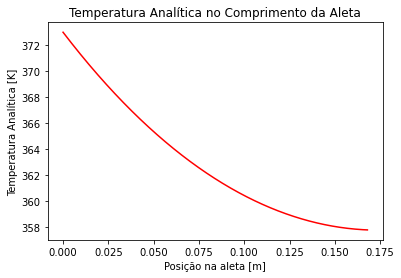

In [108]:
lista_temp_analitica = []

P = 2*pi*r
Ab = pi*(r**2)

m = sqrt((h*P)/(k*Ab))

for x in np.arange(0, L, 1e-5):
    num = cosh(m*(L-x)) + (h/(m*k))*sinh(m*(L-x))
    den = cosh(m*L) + (h/(m*k))*sinh(m*L)
    dis_temp = num/den
    teta_L = dis_temp*(Tb-Ta)
    Tl = teta_L + Ta
    lista_temp_analitica.append(Tl)

plt.plot(np.arange(0, L, 1e-5), lista_temp_analitica, 'r')
plt.title("Temperatura Analítica no Comprimento da Aleta")
plt.xlabel("Posição na aleta [m]")
plt.ylabel("Temperatura Analítica [K]")
plt.show()

In [109]:
# Temperatura na extremidade da aleta:
print('A temperatura da extremidade da aleta é: {:.3f} °C'.format(lista_temp_analitica[len(lista_temp_analitica)-1]-273))

A temperatura da extremidade da aleta é: 84.798 °C


- Determine a taxa de transferência de calor, a eficiência e a efetividade para a geometria da aleta usada.

In [110]:
# Taxa de tranferência de calor:
M = sqrt(h*P*k*Ab)*(Tb-Ta)
qa = M*((sinh(m*L)+(h/(m*k))*cosh(m*L))/(cosh(m*L)+(h/(m*k))*sinh(m*L)))

print('A taxa de tranferência de calor é: {:.3f} W'.format(qa))

A taxa de tranferência de calor é: 12.747 W


In [111]:
# Efetividade da aleta:
efetividade = qa/(h*Ab*(Tb-Ta))
print('A efetividade da aleta é: {:.3f}'.format(efetividade))

A efetividade da aleta é: 25.045


In [112]:
# Eficiência da aleta:
As = Ab + (2*pi*r*L)
na = qa/(h*As*(Tb-Ta))
print('A eficiência da aleta é: {:.3f} %'.format(na*100))

A eficiência da aleta é: 86.364 %


- Assumindo a hipótese de aleta infinita, determine a taxa de transferência de calor. Compare esse valor com o resultado obtido no item anterior. Qual deveria ser o comprimento da aleta para que a hipótese de aleta infinita forneça uma medida precisa para a perda de calor.

In [113]:
# Taxa de tranferência de calor da aleta infinita
print('A taxa de tranferência de calor da aleta infinita é: {:.3f} W'.format(M))

A taxa de tranferência de calor da aleta infinita é: 21.108 W


In [115]:
# Qual deveria ser o comprimento da aleta?
qa_aleta_infinita = M
qa_L = qa
comprimento = L
while(qa_aleta_infinita - qa_L > 0.01):
    qa_L = M*((sinh(m*comprimento)+(h/(m*k))*cosh(m*comprimento))/(cosh(m*comprimento)+(h/(m*k))*sinh(m*comprimento)))
    comprimento += 1e-5

print('O comprimento da aleta para que a hipótese da aleta infinita forneça uma medida precisa de perda de calor é: {:.3f} cm'.format(comprimento*100))


O comprimento da aleta para que a hipótese da aleta infinita forneça uma medida precisa de perda de calor é: 103.265 cm


## Questão 2

Um longo bastão circular de alumínio tem uma de suas extremidades fixada a uma parede aquecida e transfere calor por convecção para um fluido frio.

- Se o diâmetro do bastão fosse triplicado, qual seria a mudança na taxa de remoção de calor através do bastão?